In [73]:
import pandas as pd
import sqlite3
con = sqlite3.connect("boolder.db")
df = pd.read_sql("SELECT * FROM problems", con)
# show 100 rows
pd.set_option('display.max_rows', 100)


In [74]:
areas = pd.read_sql("SELECT * FROM areas", con)
areas.rename(columns={"id": "area_id", "name": "area_name"}, inplace=True)

In [75]:
df = df.merge(areas[["area_id", "area_name"]], on="area_id", how="left")
df = df.sort_values("popularity", ascending=False)
df

,id,name,name_en,name_searchable,grade,latitude,longitude,circuit_id,circuit_number,circuit_color,steepness,sit_start,area_id,bleau_info_id,featured,popularity,parent_id,area_name
640,690,Le Toit du Cul de Chien,Le Toit du Cul de Chien,letoitduculdechien,7a,48.376143,2.522716,NaN,None,None,roof,0,2,173,1,23402,NaN,Cul de Chien
500,506,La Marie-Rose,La Marie-Rose,lamarierose,6a,48.447066,2.639099,15.0,22,red,wall,0,4,2128,1,18910,NaN,Cuvier
3003,3409,Graviton,Graviton,graviton,7a,48.374257,2.514130,NaN,None,red,wall,0,12,782,1,16879,NaN,Roche aux Sabots
2529,2902,Retour aux Sources,Retour aux Sources,retourauxsources,7a,48.385725,2.527241,NaN,None,None,overhang,1,10,5,1,13812,NaN,95.2
2954,3355,L'Oblique,L'Oblique,loblique,7a,48.374647,2.513958,NaN,None,None,roof,0,12,767,1,13426,3319.0,Roche aux Sabots
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,12028,Amok (assis),Amok (assis),amokassis,8a+,48.384508,2.694254,NaN,None,None,overhang,1,52,11464,0,0,12027.0,Rocher de Bouligny
3840,4282,Mars Attaque,Mars Attaque,marsattaque,6b+,48.398928,2.520316,NaN,None,None,wall,0,15,12059,0,0,NaN,Gorge aux Châts
11314,12031,La Peau d'Éléphant,La Peau d'Éléphant,lapeaudelephant,4b,48.384726,2.695105,NaN,None,None,slab,0,52,16789,0,0,NaN,Rocher de Bouligny
11315,12032,La Grattonade du 17 Octobre,La Grattonade du 17 Octobre,lagrattonadedu17octobre,5a,48.384703,2.695097,NaN,None,None,slab,0,52,16790,0,0,NaN,Rocher de Bouligny


<Axes: xlabel='grade'>

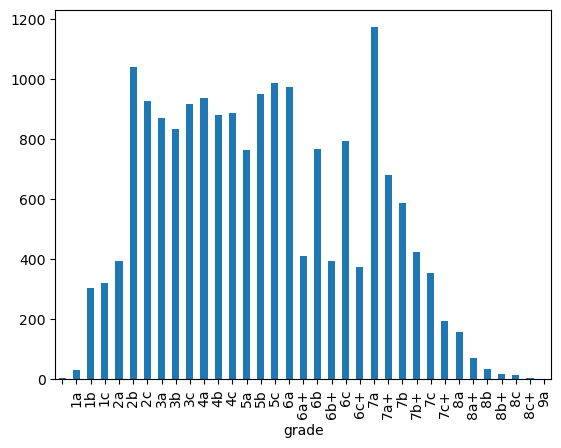

In [76]:
df["grade"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='steepness'>

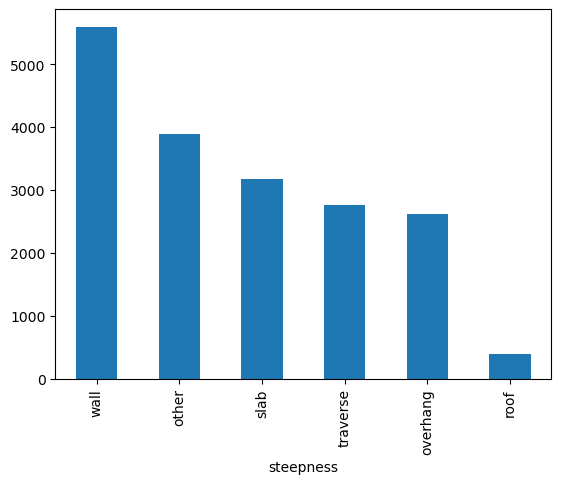

In [77]:
df["steepness"].value_counts().plot(kind="bar")

In [78]:
import plotly.express as px

# Create a count of problems by steepness and grade
treemap_data = df.groupby(['steepness', 'grade']).size().reset_index(name='count')

# Create the treemap with vibrant colors and count labels
fig = px.treemap(treemap_data, 
                 path=['steepness', 'grade'],
                 values='count',
                 title='Boulder Problems by Steepness and Grade',
                 color_continuous_scale='Viridis', # More vibrant colorscale
                 custom_data=['count'])

# Update hover template to show count and add some style
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Count: %{customdata[0]:,.0f}<extra></extra>',
    textinfo='label+value',
    marker=dict(
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#D4A5A5'],
        line=dict(width=2)
    )
)

fig.show()


In [79]:
# Create grouped bar chart of problems by grade and steepness
grade_counts = df.groupby(['grade', 'steepness']).size().reset_index(name='count')

fig = px.bar(grade_counts, 
             x='grade',
             y='count',
             color='steepness',
             title='Boulder Problems by Grade and Steepness',
             labels={'count': 'Count', 'grade': 'Grade', 'steepness': 'Steepness'},
             color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#D4A5A5'])

fig.update_xaxes(categoryorder='category ascending')

# Add click event to show individual problems
fig.update_traces(
    customdata=grade_counts[['grade', 'steepness']],
    hovertemplate='<b>%{x}</b><br>Steepness: %{customdata[1]}<br>Count: %{y}<extra></extra>'
)

def show_problems(trace, points, selector):
    if points.point_inds:
        grade = points.customdata[0][0]
        steepness = points.customdata[0][1]
        problems = df[(df['grade'] == grade) & (df['steepness'] == steepness)]
        print(f"\nProblems with Grade {grade} and Steepness {steepness}:")
        print(problems[['name', 'grade', 'steepness', 'popularity']].to_string())

fig.data[0].on_click(show_problems)

fig.show()


In [97]:
sorted(areas.area_name.unique())

['91.1',
 '95.2',
 'Apremont',
 'Apremont Bizons',
 'Apremont Butte aux Dames',
 'Apremont Désert',
 'Apremont Envers',
 'Apremont Est',
 'Apremont Ouest',
 'Apremont Portes du Désert',
 'Apremont Solitude',
 'Apremont Sully',
 'Beauvais Hameau',
 'Beauvais Loutteville',
 'Beauvais Nainville',
 'Beauvais Roches Noires',
 'Beauvais Télégraphe',
 'Bois Rond',
 'Buthiers Canard',
 'Buthiers Piscine',
 'Buthiers Tennis',
 'Canche aux Merciers',
 'Corne-Biche',
 'Cul de Chien',
 'Cuvier',
 'Cuvier Bellevue',
 'Cuvier Est',
 'Cuvier Merveille',
 'Cuvier Nord',
 'Cuvier Ouest',
 'Cuvier Petit Rempart',
 'Cuvier Reconnaissance',
 'Cuvier Rempart',
 'Dame Jouanne',
 'Darvault',
 'Diplodocus',
 'Drei Zinnen',
 'Franchard Cuisinière',
 'Franchard Cuisinière Crêtes Sud',
 'Franchard Hautes Plaines',
 'Franchard Isatis',
 'Franchard Meyer',
 'Franchard Raymond',
 'Franchard Sablons',
 'Franchard Sablons Carriers',
 'Gorge aux Châts',
 'Grande Montagne',
 'Gros Sablons',
 'Gros Sablons Nord',
 'Haut

In [100]:
df[
    df["grade"].str.startswith("7c") & 
    df["steepness"].isin(["roof", "overhang"]) &
    df["area_name"].isin(['Gorge aux Châts',]) # 'Rocher des Souris', 'Jean des Vignes', 'Rocher des Potets',  '95.2',  
].sort_values("popularity", ascending=False)

,id,name,name_en,name_searchable,grade,latitude,longitude,circuit_id,circuit_number,circuit_color,steepness,sit_start,area_id,bleau_info_id,featured,popularity,parent_id,area_name
3845,4288,La Grande Caravane,La Grande Caravane,lagrandecaravane,7c,48.399148,2.520176,NaN,None,None,overhang,1,15,12042,0,324,NaN,Gorge aux Châts
3839,4281,No Comply,No Comply,nocomply,7c,48.398923,2.520338,NaN,None,None,overhang,1,15,303953,0,84,NaN,Gorge aux Châts
3811,4250,Agression Totale,Agression Totale,agressiontotale,7c,48.398992,2.519971,NaN,None,None,overhang,0,15,23611,0,43,NaN,Gorge aux Châts


In [101]:
df.head().to_clipboard()

# Vero's list 
Velociraptor
Extraction Divine (assis)
La Grande Caravane

In [ ]:
# Create an interactive map showing climbing areas
import folium
from folium import plugins

# Get unique areas with their coordinates
areas = df.groupby('area_name').agg({
    'lat': 'first',
    'lon': 'first',
    'id': 'count'  # Count problems per area
}).reset_index()

# Create base map centered on Fontainebleau
m = folium.Map(
    location=[48.4, 2.7],  # Approximate center of Fontainebleau
    zoom_start=11
)

# Add markers for each area
for idx, row in areas.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['lon']):  # Check for valid coordinates
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=int(np.log(row['id'] + 1) * 3),  # Size based on number of problems
            popup=f"{row['area_name']}<br>{row['id']} problems",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(m)

# Add a fullscreen option
plugins.Fullscreen().add_to(m)

# Display the map
m
